# **Data_ETL**

## Objectives

* Extract, transform and load data ready for analysis

## Inputs

* Students' Academic Performance Dataset from Kaggle (see README for details)

## Outputs

* Cleaned data for use in analysis and visualisation, which are to be performed in the following Jupyter notebook files

# 1 Import packages


Import relevant packages required for data analysis and visualisation.

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn and Plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2 Data extract and familiarisation

Read in csv file and familiarise with the file structure at a high level, through use of various dataframe methods:

In [ ]:
# Load the dataset and display the first few rows
df = pd.read_csv('../data/inputs/raw/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# Display the shape of the DataFrame
df.shape

(480, 17)

In [ ]:
# Display the column data types and check for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# Display basic statistics of the DataFrame
# including mean, standard deviation, minimum, maximum and percentiles for the numerical columns
# and unique counts for categorical columns
df.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


### Observations:
- There are 480 rows of student records and 17 data columns.

- There is no missing data in each of the columns.

- 4 of the columns use numerical values, and integers more specifically.  The rest of the columns use categorical values.

- Column headings have mixed use of capital letters and some headings can be more descriptive.  Best practice is to use lower case or snake case.

### Follow up actions:

- Familiarise with data format and check for potential typos or duplicates within each categorical column.

- Create charts to help visualise distribution of values under each numerical column.

- Add column headings to the list for data cleaning.

# 3 Categorical columns drilldown

Familiarise with data format and check for potential typos or duplicates within each categorical column.

In [15]:
# Check for unique values in the gender column
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
# Check for unique values in the NationalITy column
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

Observation and code enhancement:

There are 14 columns and it would be quite time consuming to run the above uniqueness check individually.  A For Loop is added below to automate the process.

In [23]:
# Filter only categorical columns
categorical_columns = df.select_dtypes(include='object')

# Loop through and print unique values for each object column
for col in categorical_columns.columns:
    print(f"Categorical Column: {col}")
    print(df[col].unique())
    print('-' * 30)

Categorical Column: gender
['M' 'F']
------------------------------
Categorical Column: NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
------------------------------
Categorical Column: PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
------------------------------
Categorical Column: StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']
------------------------------
Categorical Column: GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
------------------------------
Categorical Column: SectionID
['A' 'B' 'C']
------------------------------
Categorical Column: Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
------------------------------
Categorical Column: Semester
['F' 'S']
------------------------------
C

### Observations:

All columns have genuinely unique values.

Some areas for considerations in the data cleaning exercise:

- KW and KuwaIT were used in different columns representing the same country.
- Data entries can be more descriptive for the purpose of executive dashboard, e.g. full words 'male' and 'female' instead of 'M' and 'F'.
- Manual encoding for some categorical columns could be helpful e.g. for ordering purposes - GradeID from lowest to highest.  
- Other forms of encoding, e.g. one hot encoding could be necessary for machine learning exercise.
- Students' marks were grouped into 3 classes: L, M, H.  These will need to be re-classed into Pass/Fail category to meet the business requirements.
- Lower cases are preferred for all categorical data entries as best practice.

### Decisions and Actions:

- Convert into lower cases where possible for categorical data entries, and align between different columns, e.g. KuwaIT vs KW.
- Consider feature selection, i.e. reduction in number of columns used for prediction modelling, as part of the exploratory data analysis.
- Use feature engineering to change groupings of student's marks from 3 into 2, i.e. Pass/Fail categories.
- Getting the data format and structure ready for dashboard is considered as higher priority than for machine learning at this point of the project.  This is partly because automatic encoding may be available from e.g. Scikit-learn machine learning pipelines.  We will use ordinal encoding and enhance data descriptiveness as part of the data cleaning exercise.

# 4 Numerical columns drilldown

Create charts to help visualise distribution of values under each numerical column.

Recap: the 4 numerical columns are:

- raisedhands

- VisITedResources

- AnnouncementsView

- Discussion

We will use boxplot in the Matplotlib library for the visualisation.  Boxplot is chosen for the ease of comparison amongst the columns on spread of data and possible outliers.  Matplotlib is chosen for its simplicity and a quick visualisation for own use primarily.

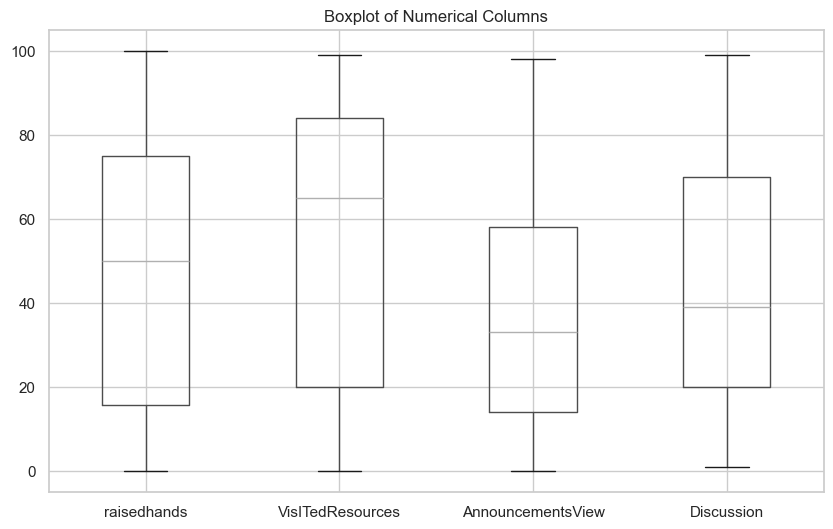

In [ ]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64'])

# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 6))     # Adjust the figure size for legibility
numerical_cols.boxplot()        # This employs Pandas method which provides side-by-side comparison of the chosen boxplots
plt.title("Boxplot of Numerical Columns")
plt.show()

### Observations:

There are no visible outliers in the boxplots, and they all have similar value range, between 0 and 100.

Neither treatment for outliers nor normalisation is deemed necessary.

# 5 Data cleaning

- Column heading: convert to lower cases and make them more descriptive
- Convert into lower cases where possible for categorical data entries, and align between different columns, e.g. KuwaIT vs KW.
- Use feature engineering to change groupings of student's marks from 3 into 2, i.e. Pass/Fail categories.
- Data entries: Use ordinal encoding and enhance data descriptiveness

Notes:

EDA e.g. for dashboard - check if need of new metric, e.g. average, rate
